In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("pyrush.csv")

In [ ]:
print(df.head())
print(df.info())
cols_to_convert = ['Production (Tons)', 'Production per Person (Kg)', 'Acreage (Hectare)', 'Yield (Kg / Hectare)']
for col in cols_to_convert:
    df[col] = df[col].str.replace('.', '').str.replace(',', '.').astype(float)


   Unnamed: 0   Country      Continent Production (Tons)  \
0           0    Brazil  South America       768.678.382   
1           1     India           Asia       348.448.000   
2           2     China           Asia       123.059.739   
3           3  Thailand           Asia        87.468.496   
4           4  Pakistan           Asia        65.450.704   

  Production per Person (Kg) Acreage (Hectare) Yield (Kg / Hectare)  
0                  3.668,531        10.226.205             75.167,5  
1                     260721         4.950.000             70.393,5  
2                      88287         1.675.215             73.459,1  
3                  1.264,303         1.336.575             65.442,2  
4                     324219         1.130.820               57.879  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0 

In [ ]:
numeric_cols = cols_to_convert  # Only include numeric columns here
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print(df)

     Unnamed: 0    Country      Continent  Production (Tons)  \
0             0     Brazil  South America        768678382.0   
1             1      India           Asia        348448000.0   
2             2      China           Asia        123059739.0   
3             3   Thailand           Asia         87468496.0   
4             4   Pakistan           Asia         65450704.0   
..          ...        ...            ...                ...   
98           98    Lebanon           Asia               97.0   
99           99   Djibouti         Africa               53.0   
100         100  Singapore           Asia               50.0   
101         101      Samoa        Oceania               12.0   
102         102      Syria           Asia                1.0   

     Production per Person (Kg)  Acreage (Hectare)  Yield (Kg / Hectare)  
0                      3668.531       1.022620e+07          75167.500000  
1                    260721.000       4.950000e+06          70393.500000  
2     

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)
print(df_scaled)

     Production (Tons)  Production per Person (Kg)  Acreage (Hectare)  \
0             8.998152                   -0.617236           8.860658   
1             3.958803                    0.849307           4.174490   
2             1.255977                   -0.134468           1.265924   
3             0.829171                   -0.630953           0.965154   
4             0.565136                    1.211578           0.782409   
..                 ...                         ...                ...   
98           -0.219739                   -0.638074          -0.221949   
99           -0.219739                   -0.637875           0.000000   
100          -0.219739                   -0.638114          -0.221950   
101          -0.219740                   -0.638132          -0.221951   
102          -0.219740                   -0.638166          -0.221952   

     Yield (Kg / Hectare)  
0                0.746164  
1                0.588121  
2                0.689608  
3          

In [ ]:
formula = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    formula.append(kmeans.inertia_)

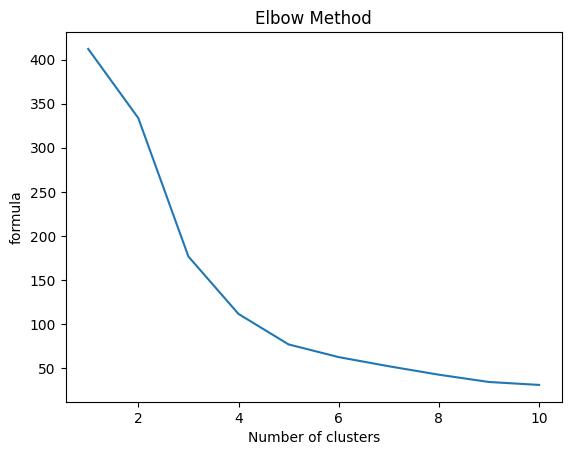

In [ ]:
plt.plot(range(1, 11), formula)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('formula')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(df_scaled)


In [ ]:
df['cluster'] = labels

In [ ]:
print(df.groupby('cluster').describe())

        Unnamed: 0                                                      \
             count       mean        std  min   25%   50%   75%    max   
cluster                                                                  
0             51.0  66.313725  24.145799  5.0  51.0  71.0  85.5  101.0   
1             51.0  36.686275  27.162835  1.0  15.5  30.0  54.0  102.0   
2              1.0   0.000000        NaN  0.0   0.0   0.0   0.0    0.0   

        Production (Tons)                ... Acreage (Hectare)              \
                    count          mean  ...               75%         max   
cluster                                  ...                                 
0                    51.0  2.377046e+06  ...           30069.0    781054.0   
1                    51.0  1.955827e+07  ...          100223.0   4950000.0   
2                     1.0  7.686784e+08  ...        10226205.0  10226205.0   

        Yield (Kg / Hectare)                                                 \
       

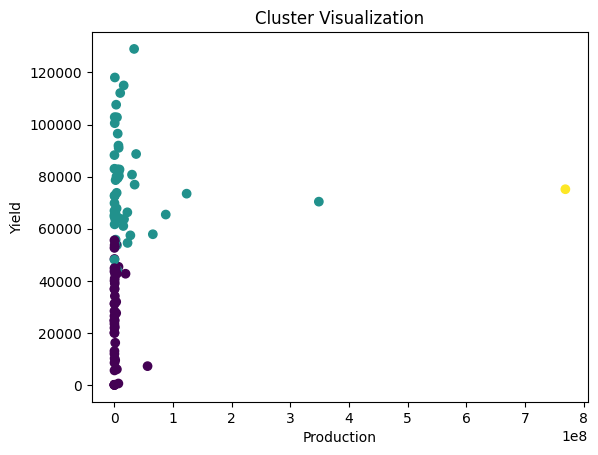

In [ ]:
plt.scatter(df['Production (Tons)'], df['Yield (Kg / Hectare)'], c=df['cluster'], cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Production')
plt.ylabel('Yield')
plt.show()